<a href="https://colab.research.google.com/github/Anuj2409/Neural-Network-Basics/blob/master/NN_Keras_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Reference   https://towardsdatascience.com/neural-networks-from-scratch-easy-vs-hard-b26ddc2e89c7



<Figure size 432x288 with 0 Axes>

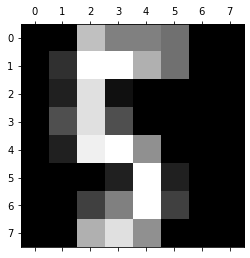

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
dig = load_digits()
plt.gray()
plt.matshow(dig.images[25])

In [0]:
onehot_target = pd.get_dummies(dig.target)

In [0]:
x_train, x_val, y_train, y_val = train_test_split(dig.data, onehot_target, test_size=0.1, random_state=20)

In [0]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam

model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='sigmoid'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [0]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 26,122
Trainable params: 26,122
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split= 0.1)

In [0]:
y_pred = model.predict(x_val)

#Converting predictions to label
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

#Converting one hot encoded test label to label
test = []
for i in y_val.index:
    test.append(np.argmax(y_val.loc[i], axis = 0))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


In [0]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 97.77777777777777


In [0]:
# Using Relu Activation Function

In [0]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import RMSprop, Adadelta, Adam

model = Sequential()
model.add(Dense(128, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_8 (Dense)              (None, 40)                5160      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                410       
Total params: 13,890
Trainable params: 13,890
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose= 0, validation_split= 0.2)

In [26]:
y_pred = model.predict(x_val)

#Converting predictions to label
pred = []
for i in range(len(y_pred)):
    pred.append(np.argmax(y_pred[i]))

#Converting one hot encoded test label to label
test = []
for i in y_val.index:
    test.append(np.argmax(y_val.loc[i], axis = 0))

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:61: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return bound(*args, **kwds)


In [27]:
from sklearn.metrics import accuracy_score
a = accuracy_score(pred,test)
print('Accuracy is:', a*100)

Accuracy is: 98.33333333333333
